In [1]:
#colab에서 openCV 사용하기

#1. file upload
from google.colab import files
upload_file = files.upload()

Saving Abyssinian_26.jpg to Abyssinian_26.jpg


In [6]:
#2. load file

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
print("OpenCV version: ", cv2.__version__)



OpenCV version:  4.1.2


In [7]:
!ls -al

total 148
drwxr-xr-x 1 root root   4096 May 25 22:56 .
drwxr-xr-x 1 root root   4096 May 25 22:55 ..
-rw-r--r-- 1 root root 133307 May 25 22:56 Abyssinian_26.jpg
drwxr-xr-x 4 root root   4096 May  6 13:43 .config
drwxr-xr-x 1 root root   4096 May  6 13:44 sample_data


In [8]:
img = cv2.imread('Abyssinian_26.jpg')

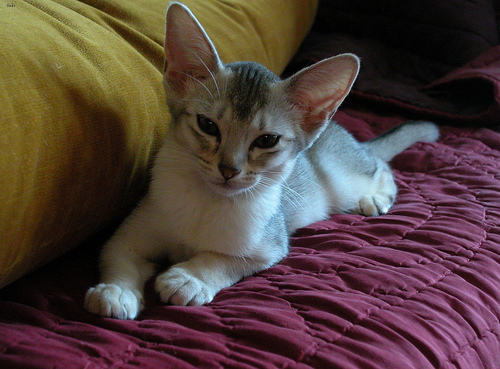

width: 500 pixels
height: 369 pixels
channels: 3
369 500 (250, 184)


In [9]:
cv2_imshow(img)

print("width: {} pixels".format(img.shape[1])) #넓이
print("height: {} pixels".format(img.shape[0])) #높이
print("channels: {}".format(img.shape[2]))

(height, width) = img.shape[:2]
center = (width // 2, height // 2)

print(height, width, center)

In [10]:
x = 54 #@param {type:"slider", min:0, max:500, step:1}
y = 49 #@param {type:"slider", min:0, max:339, step:1}
size = 30 #@param {type:"slider", min:0, max:200, step:1}

In [11]:
(b,g,r) = img[x,y]
print("Pixel at ({}, {}) - Red: {}, Green: {}, Blue : {}".format(x, y, r, g, b))

Pixel at (54, 49) - Red: 131, Green: 128, Blue : 59


In [12]:
# crop cordination = image[y: y+h, x: x+w]
croped = img[y:y+size, x:x+size]
cv2_imshow(croped)

In [19]:
background = np.full((height, width, 3), 255, np.uint8)

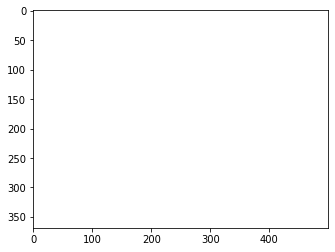

In [20]:
plt.imshow(background)

In [21]:
#잘라낸 이미지에 빨간색으로 사각형을 그린다.
img[y:y+size, x:x+size] = (0, 0, 255)
background[y:y+size, x:x+size] = (0, 0, 255)

In [ ]:
cv2.rectangle(img, (x+size*2, y), (x+size*3, y+size), (0, 255,0), 5)
cv2.rectangle(background, (x+size*2, y), (x+size*3, y+size), (0, 255,0), 5)

In [ ]:
radius = int(size/2)
cv2.circle(img, (x+size*4, y+radius), radius, (255,255,0), -1)
cv2.circle(background, (x+size*4, y+radius), radius, (255,255,0), -1)

In [ ]:
cv2.line(img, (x+size*5, y), (x+size*6, y+size), (0, 255, 255), 5)
cv2.line(background, (x+size*5, y), (x+size*6, y+size), (0, 255, 255), 5)

In [ ]:
cv2.putText(img, 'creApple', (x+size*7, y+size), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0))
cv2.putText(background, 'creApple', (x+size*7, y+size), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0))

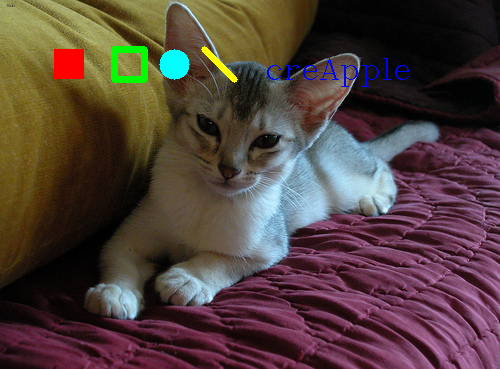

In [26]:
cv2_imshow(img)

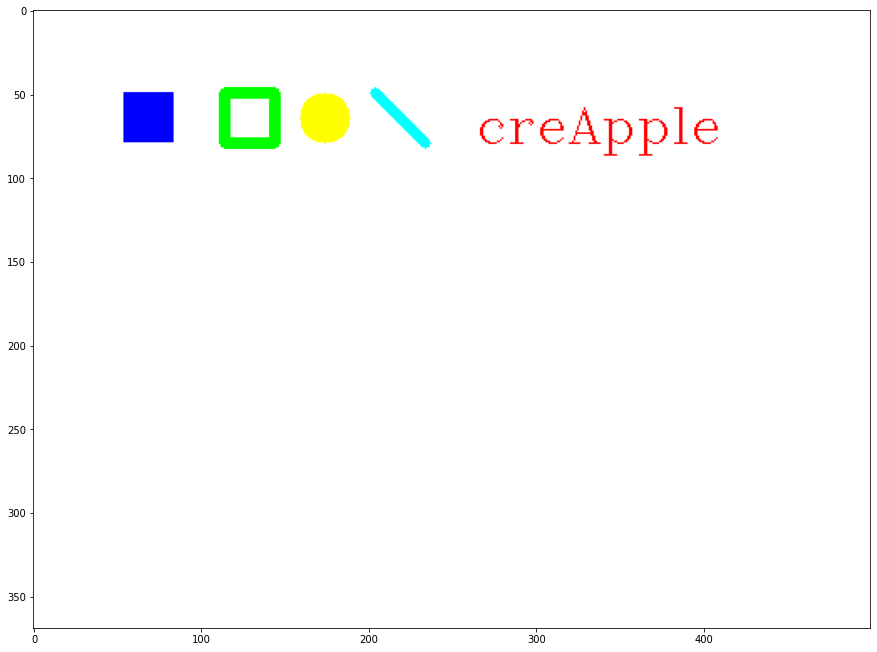

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(background)

In [29]:
cv2.imwrite('cat-copy.jpg', img)
cv2.imwrite('plt-copy.jpg', background)

True

In [30]:
!ls -al

total 252
drwxr-xr-x 1 root root   4096 May 25 23:10 .
drwxr-xr-x 1 root root   4096 May 25 22:55 ..
-rw-r--r-- 1 root root 133307 May 25 22:56 Abyssinian_26.jpg
-rw-r--r-- 1 root root  91281 May 25 23:10 cat-copy.jpg
drwxr-xr-x 4 root root   4096 May  6 13:43 .config
-rw-r--r-- 1 root root  10851 May 25 23:10 plt-copy.jpg
drwxr-xr-x 1 root root   4096 May  6 13:44 sample_data


In [32]:
def download(path):
  try:
    from google.colab import files
    files.download(path)
  except:
    import os
    print('error download: ', os.path.join(os, getcwd(), path))

In [33]:
download('plt-copy.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

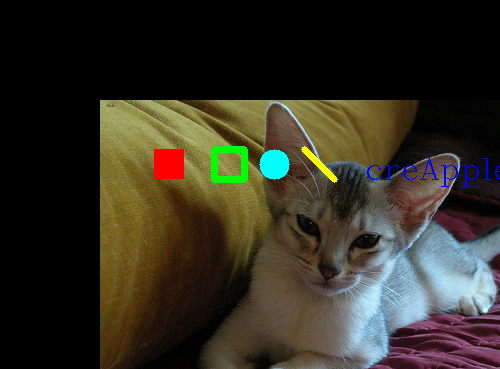

In [34]:
#moved down : +, up: - and right: +, left: -
move = np.float32([[1, 0, 100], [0, 1, 100]])
moved = cv2.warpAffine(img, move, (width, height))
cv2_imshow(moved)

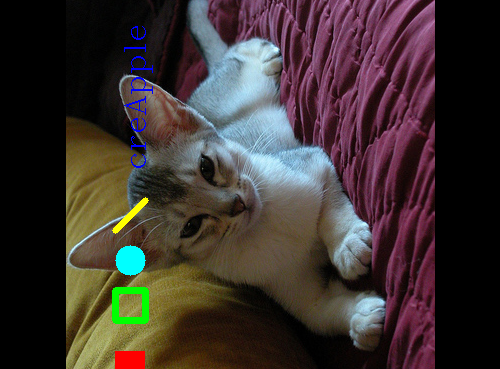

In [36]:
rotate = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated = cv2.warpAffine(img, rotate, (width, height))
cv2_imshow(rotated)

In [37]:
ratio = size / width
dimention = (size, int(height*ratio))

In [38]:
resized = cv2.resize(img, dimention,interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

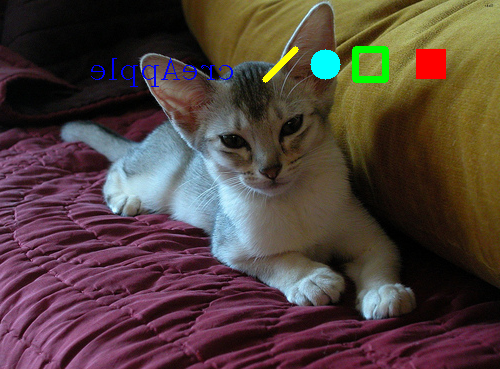

In [39]:
#filipped horizontal 1, vertical 0, both -1
flipped = cv2.flip(img, 1)
cv2_imshow(flipped)

Mask

In [40]:
mask = np.zeros(img.shape[:2], dtype='uint8')

In [ ]:
cv2.circle(mask, center, int(height/2), (255,255,255), -1)

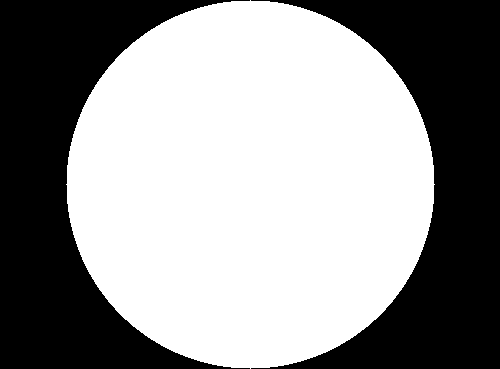

In [42]:
cv2_imshow(mask)

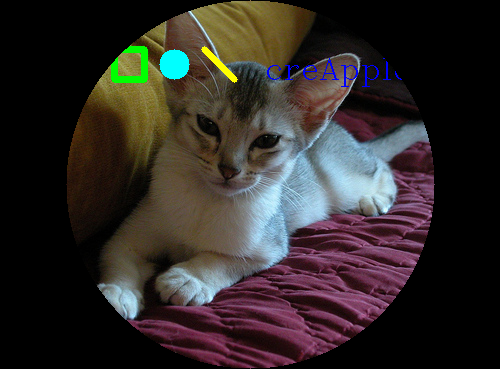

In [44]:
masked = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(masked)

Filter

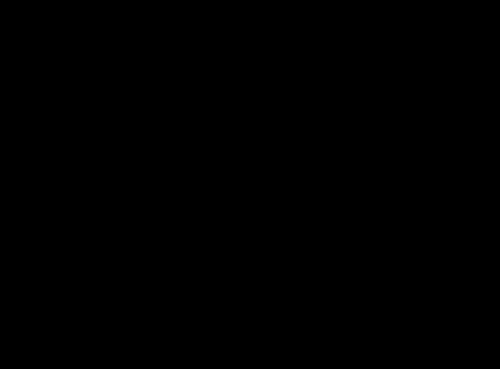

In [45]:
zeros = np.zeros(img.shape[:2], dtype='uint8')
cv2_imshow(zeros)

In [46]:
(blue, green, red) = cv2.split(img)

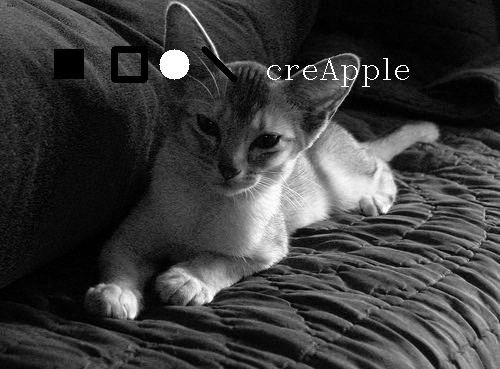

In [47]:
cv2_imshow(blue)

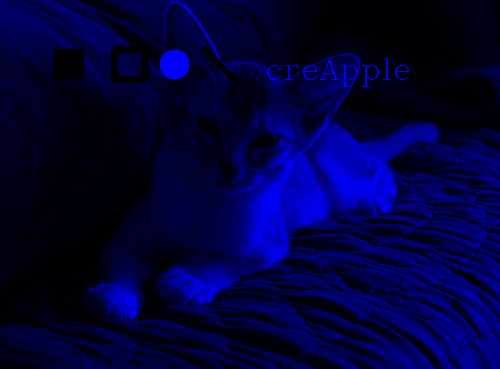

In [49]:
cv2_imshow(cv2.merge([blue, zeros, zeros]))

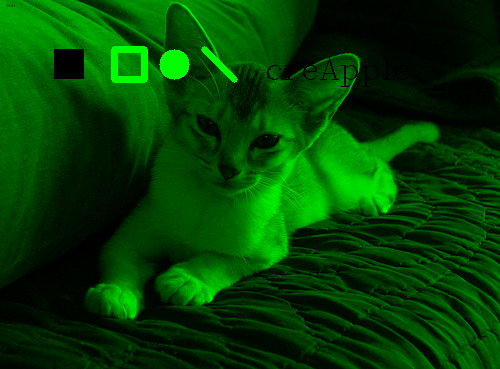

In [50]:
cv2_imshow(cv2.merge([zeros, green, zeros]))

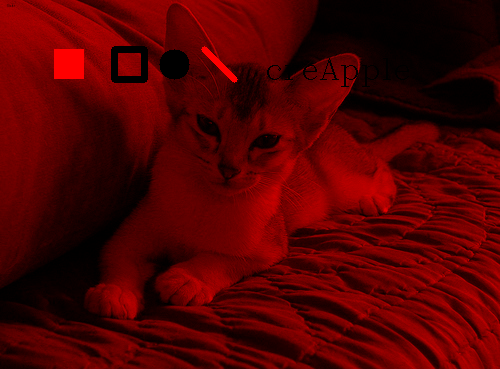

In [51]:
cv2_imshow(cv2.merge([zeros, zeros, red]))

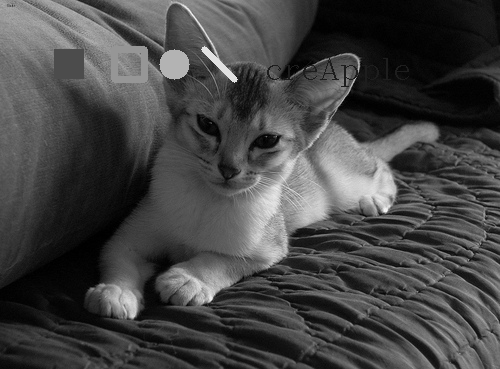

In [52]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

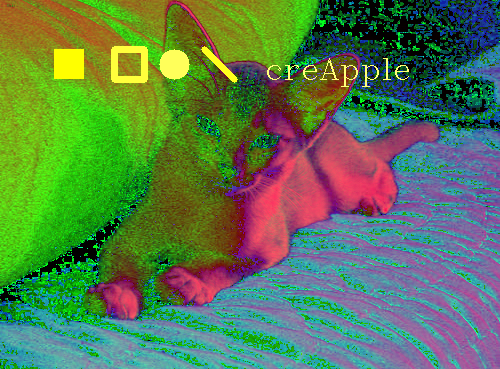

In [53]:
#hsv(Hue:색상, Saturation:채도, Value:명도)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

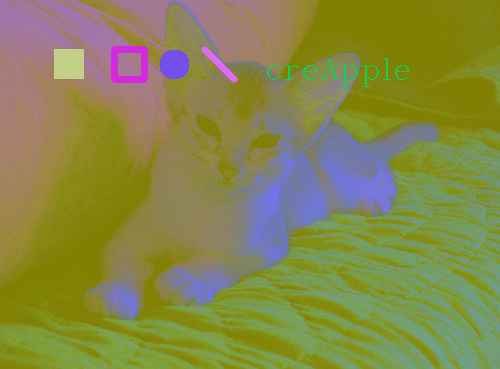

In [54]:
#
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)

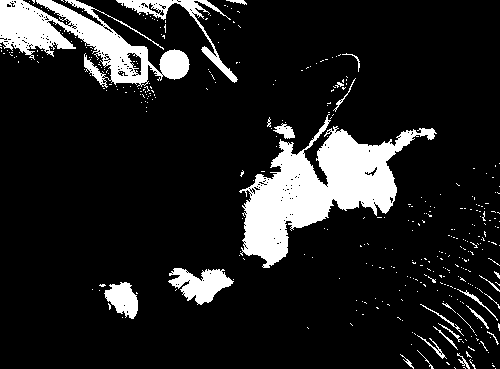

In [55]:
ret, thresh = cv2.threshold(gray, 127, 255, 0)
cv2_imshow(thresh)

641


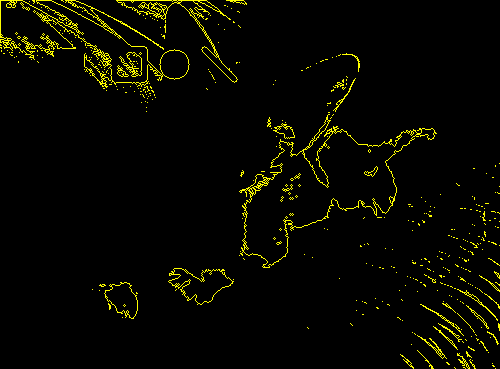

In [62]:
#https://opencv-python.readthedocs.io/en/latest/doc/15.imageContours/imageContours.html
contours, hierachy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)
print(len(contours))
back = np.zeros((height, width, 3), np.uint8)
for i in range(len(contours)):
  cv2.drawContours(back, contours, i, (0, 255, 255))

cv2_imshow(back)

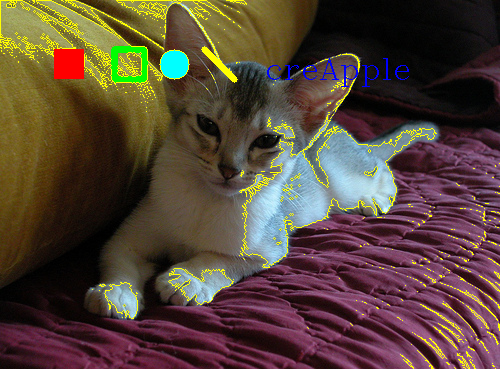

In [63]:
for i in range(len(contours)):
  cv2.drawContours(img, contours, i, (0, 255, 255))

cv2_imshow(img)